# IndyCar Lap Time Analysis

This notebook analyzes and visualizes lap time for IndyCar drivers in a given race.

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

# Enable inline plotting
%matplotlib inline

## Loading the Data

In [76]:
# Load the lap time data
df = pd.read_csv('indycar-lap-times.csv')

# Display basic information
print(f"Total lap times recorded: {len(df)}")
print("\nCounts by driver:")
print(df['Driver'].value_counts())

# Display the first few rows
df.head()

Total lap times recorded: 2443

Counts by driver:
Driver
Newgarden, Josef\nBarber Motorsports Park\nSection Data Report\nMay 4          91
Power, Will\nBarber Motorsports Park\nSection Data Report\nMay 4               91
Rosenqvist, Felix\nBarber Motorsports Park\nSection Data Report\nMay 4         91
Kirkwood, Kyle\nBarber Motorsports Park\nSection Data Report\nMay 4            91
Herta, Colton\nBarber Motorsports Park\nSection Data Report\nMay 4             91
Rasmussen, Christian\nBarber Motorsports Park\nSection Data Report\nMay 4      91
McLaughlin, Scott\nBarber Motorsports Park\nSection Data Report\nMay 4         91
Veekay, Rinus\nBarber Motorsports Park\nSection Data Report\nMay 4             91
Rahal, Graham\nBarber Motorsports Park\nSection Data Report\nMay 4             91
Rossi, Alexander\nBarber Motorsports Park\nSection Data Report\nMay 4          91
Malukas, David\nBarber Motorsports Park\nSection Data Report\nMay 4            91
Dixon, Scott\nBarber Motorsports Park\nSe

,Car,Driver,Lap,T (Time)
0,2,"Newgarden, Josef\nBarber Motorsports Park\nSec...",1,76.5004
1,2,"Newgarden, Josef\nBarber Motorsports Park\nSec...",2,72.1769
2,2,"Newgarden, Josef\nBarber Motorsports Park\nSec...",3,71.4320
3,2,"Newgarden, Josef\nBarber Motorsports Park\nSec...",4,71.0382
4,2,"Newgarden, Josef\nBarber Motorsports Park\nSec...",5,71.8483


## Data Preprocessing

In [ ]:
# Convert the Time column to float if it's not already
df['T (Time)'] = df['T (Time)'].astype(float)

# Create a more readable driver column for plotting
df['DriverName'] = df['Driver'].apply(lambda x: x.split(',')[0])

# Calculate some basic statistics
stats = df.groupby('DriverName')['T (Time)'].agg(['mean', 'std', 'min', 'max', 'count'])
stats.columns = ['Average Time', 'Std Dev', 'Fastest Lap', 'Slowest Lap', 'Lap Count']

# Format the numeric columns to 3 decimal places (except for Lap Count which is an integer)
for col in ['Average Time', 'Std Dev', 'Fastest Lap', 'Slowest Lap']:
    stats[col] = stats[col].round(3)

# Order the stats by average lap time
stats = stats.sort_values(by='Slowest Lap', ascending=True)

# Display the sorted stats
stats

,Average Time,Std Dev,Fastest Lap,Slowest Lap,Lap Count
DriverName,,,,,
Palou,70.073,0.659,68.130,71.906,91
Lundgaard,70.215,0.767,67.895,74.755,91
Veekay,70.264,0.761,67.369,73.873,91
McLaughlin,70.342,0.770,67.231,72.769,91
Herta,70.387,0.683,68.138,72.964,91
O'Ward,70.426,0.753,67.982,75.001,91
Power,70.434,0.631,68.121,73.513,91
Siegel,70.537,0.800,68.046,74.460,91
Rossi,70.551,0.837,67.582,75.101,91


## Visualization: Lap Times Throughout the Race

Found 27 unique drivers in the dataset


/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/2043486571.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv', len(unique_drivers))


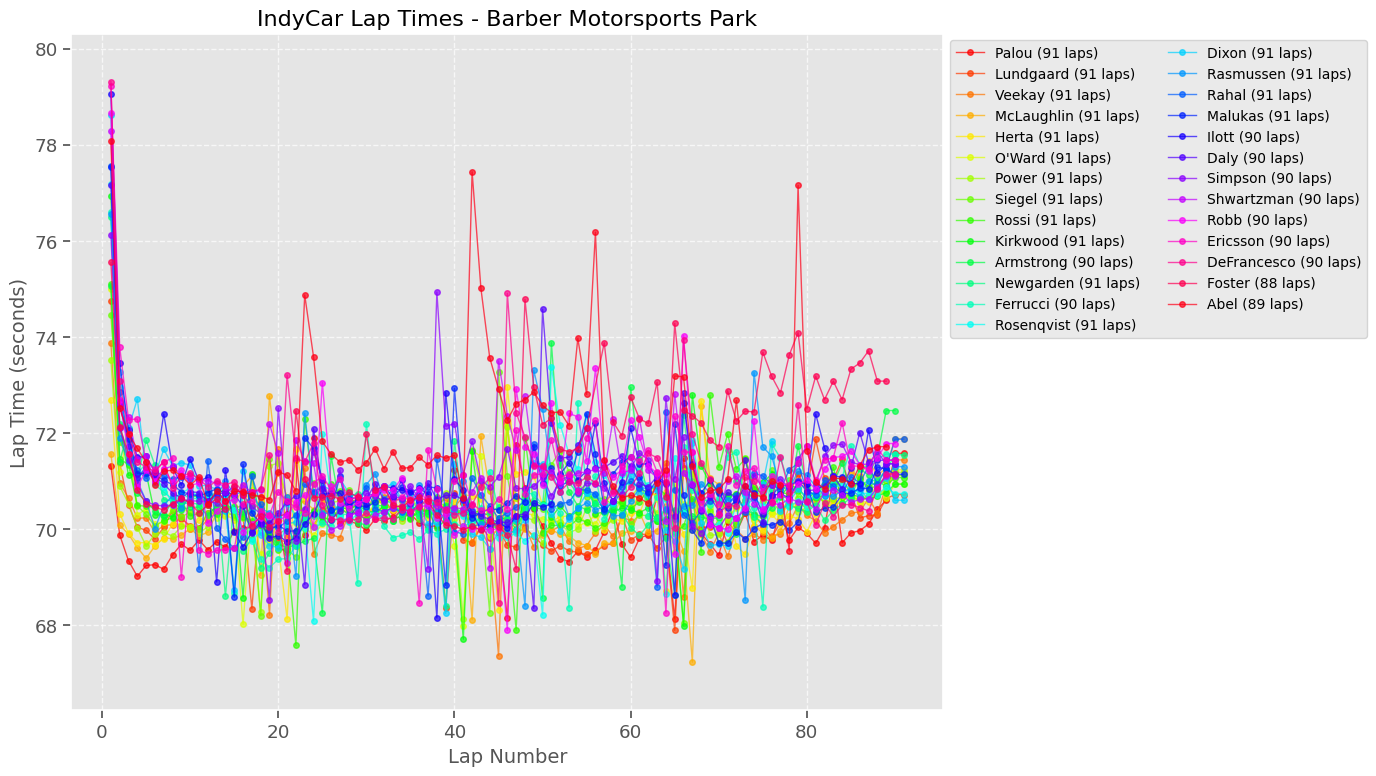

In [69]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(14, 8))

# Get all unique drivers from the DataFrame
unique_drivers = df['Driver'].unique()
print(f"Found {len(unique_drivers)} unique drivers in the dataset")

# Generate colors using a colormap - this ensures distinct colors for all drivers
# Using tab20 colormap which provides 20 distinct colors
if len(unique_drivers) <= 20:
    colormap = cm.get_cmap('tab20', len(unique_drivers))
    colors = [colormap(i) for i in range(len(unique_drivers))]
else:
    # If more than 20 drivers, use hsv which can generate any number of distinct colors
    colormap = cm.get_cmap('hsv', len(unique_drivers))
    colors = [colormap(i) for i in range(len(unique_drivers))]

# Sort drivers by their average lap time to make the legend more meaningful
driver_avg_times = []
for driver in unique_drivers:
    driver_data = df[df['Driver'] == driver]
    avg_time = driver_data['T (Time)'].mean()
    driver_avg_times.append((driver, avg_time))

# Sort by average lap time (fastest first)
driver_avg_times.sort(key=lambda x: x[1])
sorted_drivers = [d[0] for d in driver_avg_times]

# Plot each driver's lap times
for i, driver in enumerate(sorted_drivers):
    # Extract just the last name for the legend
    last_name = driver.split(',')[0]
    
    driver_data = df[df['Driver'] == driver]
    if len(driver_data) > 0:
        plt.plot(driver_data['Lap'], driver_data['T (Time)'], 'o-', 
                 color=colors[i],
                 label=f"{last_name} ({len(driver_data)} laps)", 
                 alpha=0.7, linewidth=1, markersize=4)

plt.title('IndyCar Lap Times - Barber Motorsports Park', fontsize=16)
plt.xlabel('Lap Number', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)

# Create a more manageable legend
# If there are many drivers, split the legend into multiple columns
if len(sorted_drivers) > 10:
    plt.legend(ncol=2, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
else:
    plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits to focus on the typical lap time range
# Dynamically set based on the data range
all_times = df['T (Time)']
min_time = max(all_times.min() - 1, 65)  # Don't go below 65 seconds
max_time = min(all_times.max() + 1, 85)  # Don't go above 85 seconds
plt.ylim(min_time, max_time)

plt.tight_layout()
plt.show()

## Visualization: Lap Time Distribution

/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'])
/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:4: UserWarning: 
The palette list has fewer values (3) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'])


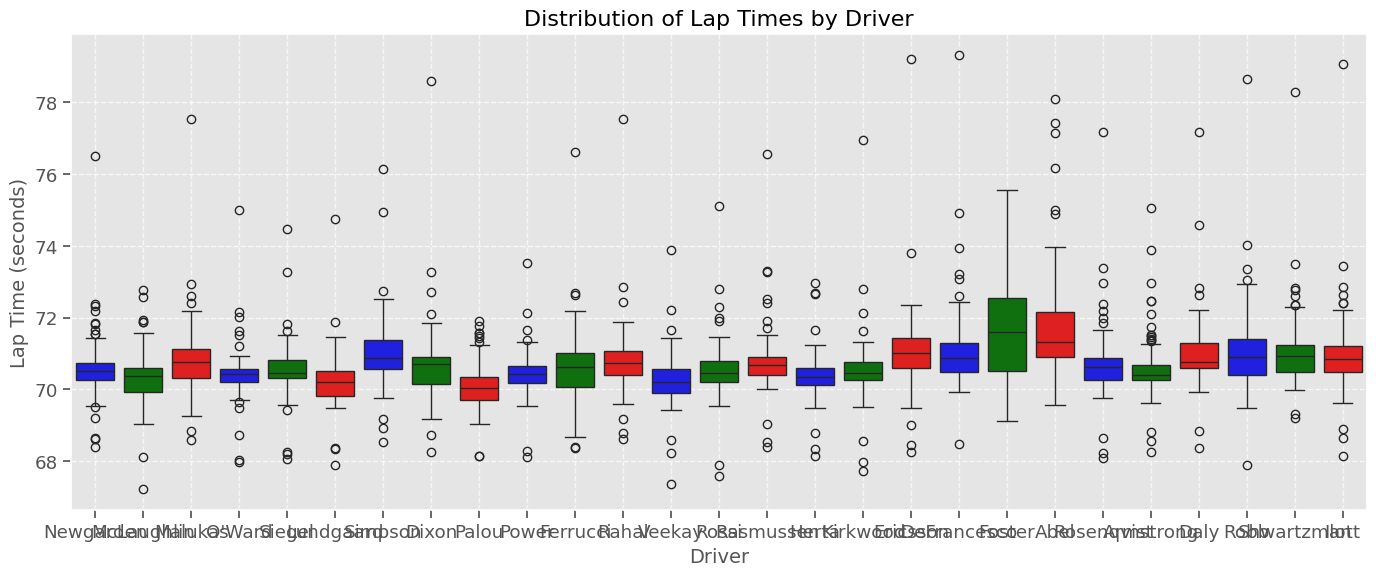

/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'], inner='quartile')
/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:14: UserWarning: 
The palette list has fewer values (3) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'], inner='quartile')


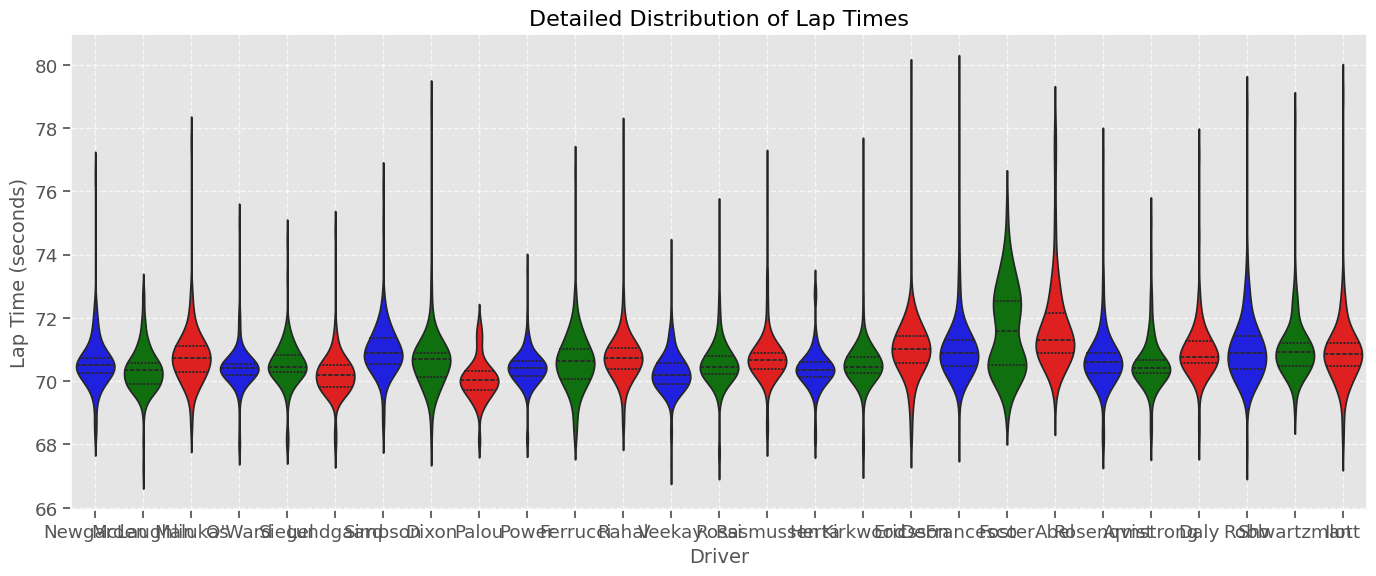

In [70]:
plt.figure(figsize=(14, 6))

# Box plot
sns.boxplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'])
plt.title('Distribution of Lap Times by Driver', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Violin plot for more detailed distribution
plt.figure(figsize=(14, 6))
sns.violinplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'], inner='quartile')
plt.title('Detailed Distribution of Lap Times', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Histogram of Lap Times

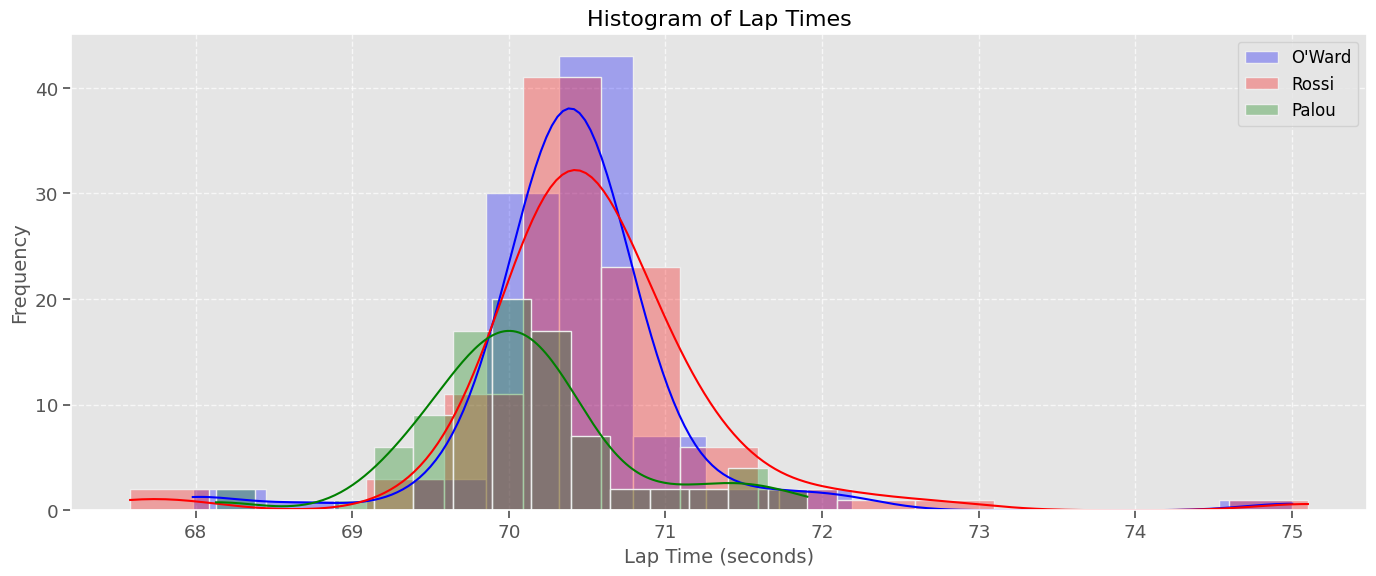

In [71]:
plt.figure(figsize=(14, 6))

# Histogram with KDE
for driver, color in zip(['O\'Ward', 'Rossi', 'Palou'], ['blue', 'red', 'green']):
    driver_data = df[df['DriverName'] == driver]['T (Time)']
    sns.histplot(driver_data, kde=True, label=driver, color=color, alpha=0.3, bins=15)

plt.title('Histogram of Lap Times', fontsize=16)
plt.xlabel('Lap Time (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Lap Time Differences from Personal Best

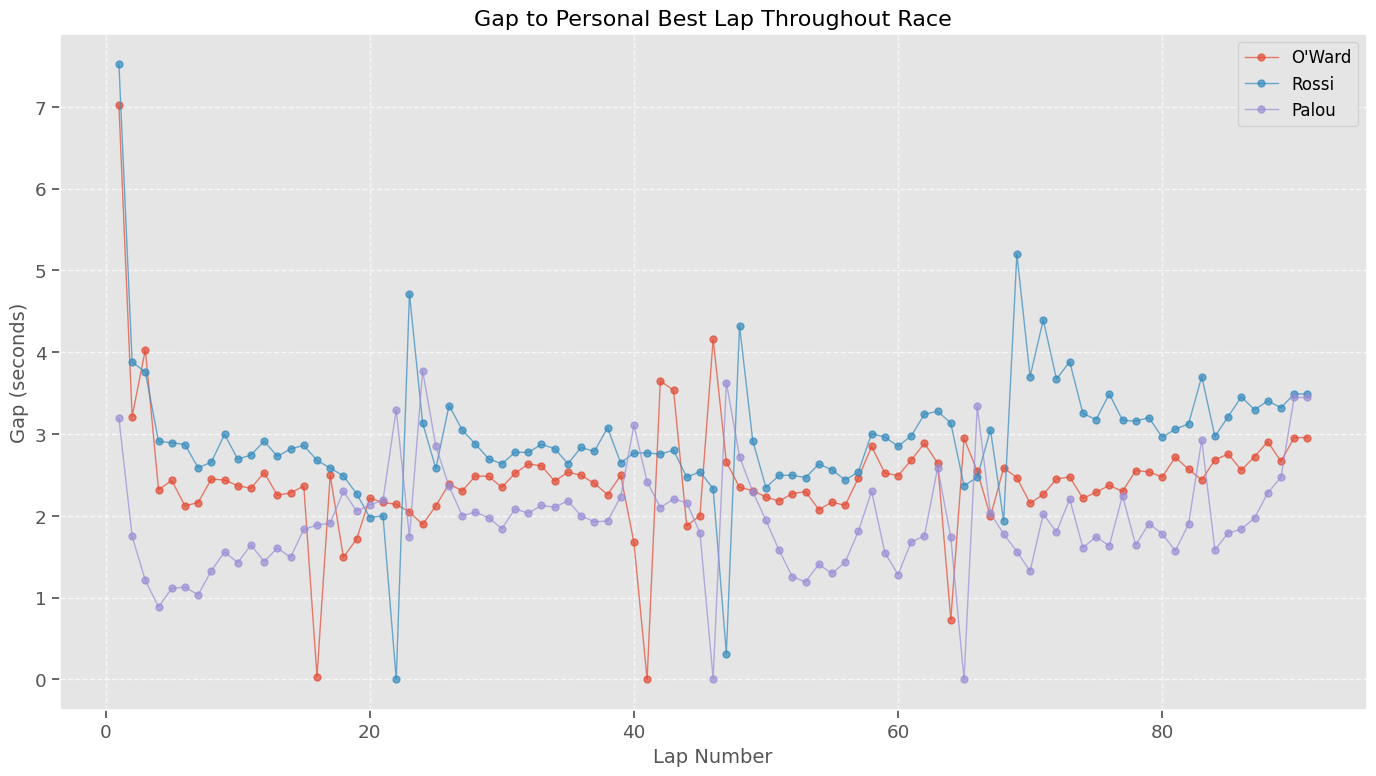

In [72]:
# Calculate gap to each driver's personal best
driver_best = df.groupby('DriverName')['T (Time)'].min().to_dict()
df['Gap to Personal Best'] = df.apply(lambda row: row['T (Time)'] - driver_best[row['DriverName']], axis=1)

plt.figure(figsize=(14, 8))

for driver, color in zip(['O\'Ward', 'Rossi', 'Palou'], ['blue', 'red', 'green']):
    driver_data = df[df['DriverName'] == driver]
    plt.plot(driver_data['Lap'], driver_data['Gap to Personal Best'], 'o-', label=driver, alpha=0.7, linewidth=1, markersize=5)

plt.title('Gap to Personal Best Lap Throughout Race', fontsize=16)
plt.xlabel('Lap Number', fontsize=14)
plt.ylabel('Gap (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Heat Map of Lap Times

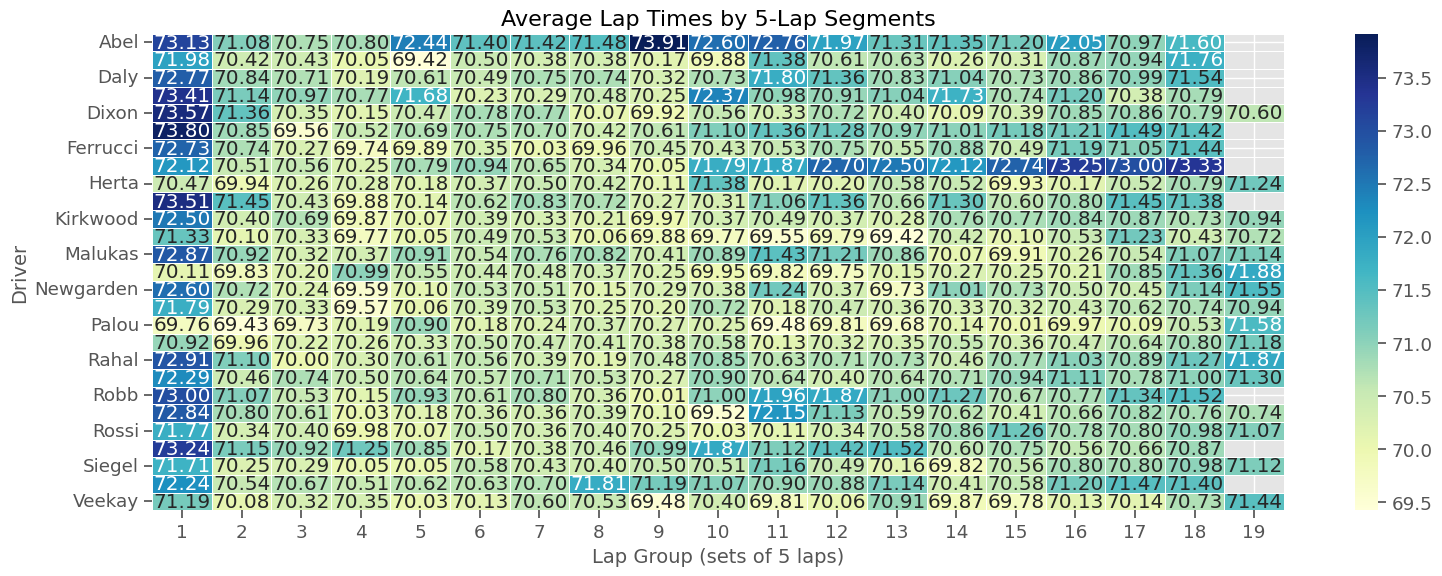

In [73]:
# Create a pivot table for the heat map
# Group laps into sets of 5 for better visualization
df['Lap Group'] = (df['Lap'] - 1) // 5 + 1
pivot_data = df.pivot_table(values='T (Time)', index='DriverName', columns='Lap Group', aggfunc='mean')

# Create the heat map
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Lap Times by 5-Lap Segments', fontsize=16)
plt.xlabel('Lap Group (sets of 5 laps)', fontsize=14)
plt.ylabel('Driver', fontsize=14)
plt.tight_layout()
plt.show()

## Statistical Comparison

In [74]:
from scipy import stats

# Compare the drivers' lap time distributions
print("Statistical comparison of lap time distributions:")
print("\nANOVA test (comparing all three drivers):")
groups = [df[df['DriverName'] == driver]['T (Time)'] for driver in ['O\'Ward', 'Rossi', 'Palou']]
f_val, p_val = stats.f_oneway(*groups)
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference between at least two drivers' lap times.")
else:
    print("There is no statistically significant difference between the drivers' lap times.")

# Pairwise t-tests
print("\nPairwise t-tests:")
for i, driver1 in enumerate(['O\'Ward', 'Rossi', 'Palou']):
    for driver2 in ['O\'Ward', 'Rossi', 'Palou'][i+1:]:
        t_val, p_val = stats.ttest_ind(
            df[df['DriverName'] == driver1]['T (Time)'],
            df[df['DriverName'] == driver2]['T (Time)'],
            equal_var=False  # Using Welch's t-test which doesn't assume equal variances
        )
        print(f"{driver1} vs {driver2}: t-value = {t_val:.4f}, p-value = {p_val:.4f}")
        if p_val < 0.05:
            print(f"  There is a statistically significant difference between {driver1} and {driver2}")
        else:
            print(f"  No statistically significant difference between {driver1} and {driver2}")

Statistical comparison of lap time distributions:

ANOVA test (comparing all three drivers):
F-value: 9.8533, p-value: 0.0001
There is a statistically significant difference between at least two drivers' lap times.

Pairwise t-tests:
O'Ward vs Rossi: t-value = -1.0531, p-value = 0.2937
  No statistically significant difference between O'Ward and Rossi
O'Ward vs Palou: t-value = 3.3698, p-value = 0.0009
  There is a statistically significant difference between O'Ward and Palou
Rossi vs Palou: t-value = 4.2762, p-value = 0.0000
  There is a statistically significant difference between Rossi and Palou


## Conclusion

Based on the visualizations and statistical analysis above, we can draw the following conclusions about the three drivers' performances:

1. **Consistency**: The box plots and violin plots show which driver had the most consistent lap times.
2. **Speed**: The average lap times indicate which driver was fastest overall.
3. **Patterns**: The line charts reveal patterns in how each driver's pace evolved throughout the race.
4. **Strategy**: Significant spikes in lap times might indicate pit stops or caution periods.

These insights could be valuable for race strategists, team managers, and the drivers themselves in understanding their performance and identifying areas for improvement.